<a href="https://colab.research.google.com/github/rameshavinash94/Deep_learning_Scratch/blob/main/DeepLearning_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numpy**

In [1]:
import numpy as np

In [2]:
class LinearActivation:
  def forward(self,inputs):
    # Just remember values self.inputs = inputs self.output = inputs (y=f(x))
    self.inputs=inputs
    self.outputs=self.inputs

  def backward(self,dvalues):
    self.dinputs=dvalues.copy()

In [3]:
class MSE:
  #forward pass
  def forward(self,ypred,y):
    loss=np.mean((y-ypred)**2,axis=-1)
    return loss
  
  #backward pass
  def backward(self,dvalues,ytrue):
    #count of data samples
    samples=len(dvalues)
    outputs=len(dvalues[0])
    self.dinputs = (-2 * (ytrue - dvalues)) / outputs
    self.dinputs = self.dinputs/samples

In [4]:
class Relu:
  #forward pass
  def forward(self,inputs):
    self.inputs=inputs
    self.output=np.maximum(0,self.inputs)
  
  #backward pass
  def backward(self,dvalues):
    self.dinputs = dvalues.copy()
    self.dinputs[self.dinputs <= 0 ]=0

In [5]:
class NNLayer:
  def __init__(self,input_dim,neurons=5):
    self.weights = np.random.randn(input_dim, neurons) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(neurons)
  
  def forward(self,X):
    self.inputs=X
    self.output = np.dot(self.inputs,self.weights) + self.bias
  
  def backward(self,dvalues):
    #parameter gradiants
    self.dweights=np.dot(self.inputs.T,dvalues)
    self.dbias = np.sum(dvalues, axis = 0 , keepdims= True )

    #gradiant on input
    self.dinputs = np.dot(dvalues,self.weights.T)

In [6]:
import numpy as np
import matplotlib.pyplot as plot 

# Get x values of the sine wave
time = np.arange(0, 10, 0.1);
# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)

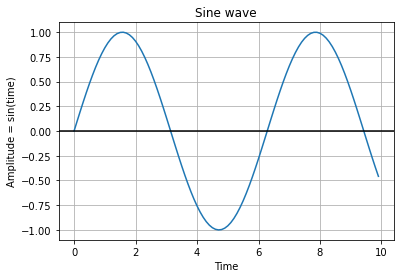

In [7]:
# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude) 

# Give a title for the sine wave plot
plot.title('Sine wave')

# Give x axis label for the sine wave plot
plot.xlabel('Time')

# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()
# Display the sine wave

plot.show()

In [8]:
X,y = time, amplitude

In [9]:
X=np.array(X)
y=np.array(y)

In [10]:
# Create Linear layer with 1 input feature and 64 output values
dense1 = NNLayer(1,64)

#add a relu activator to the layer
r_activator = Relu()

#create an another layer with 64 input features and 1 output feature
dense2 = NNLayer(64,1)

#create a linear activator
l_activator= LinearActivation()

#create loss function
loss= MSE()

In [13]:
#train in loop
for epoch in range(2000):
  dense1.forward(np.array(X).reshape(100,1))
  r_activator.forward(dense1.output)
  dense2.forward(r_activator.output)
  l_activator.forward(dense2.output)
  loss_calculation= loss.forward(l_activator.outputs,np.array(y).reshape(100,1))
  loss.backward(l_activator.outputs,np.array(y).reshape(100,1))
  l_activator.backward(loss.dinputs)
  dense2.backward(l_activator.dinputs)
  r_activator.backward(dense2.dinputs)
  dense1.backward(r_activator.dinputs)

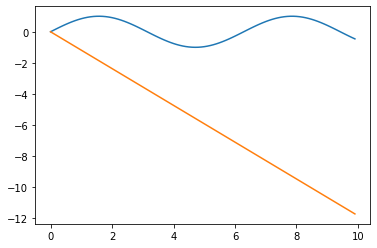

In [14]:
import matplotlib.pyplot as plt

plt.plot(X, y)
plt.plot(X, l_activator.outputs)
plt.show()